In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, r2_score, mean_squared_error, mean_absolute_error, precision_score, recall_score, f1_score

In [4]:
df = pd.read_csv('apple_quality.csv')
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [5]:
df.shape

(4001, 9)

In [6]:
df.Quality.unique()

array(['good', 'bad', nan], dtype=object)

In [7]:
df.Quality.value_counts()

good    2004
bad     1996
Name: Quality, dtype: int64

In [8]:
df.isnull().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [9]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [13]:
df.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


In [14]:
dummies = pd.get_dummies(df.Quality)
dummies

,bad,good
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1
...,...,...
3995,1,0
3996,0,1
3997,1,0
3998,0,1


In [16]:
new_df = pd.concat([df, dummies], axis = 'columns')

In [23]:
new_df = new_df.drop('A_id', axis='columns' )

In [24]:
new_df.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,bad,good
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,0,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,0,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,1,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,0,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,0,1


In [25]:
corr = new_df.corr()
corr

C:\Users\HASSAN\AppData\Local\Temp\ipykernel_1512\3146179333.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = new_df.corr()


,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,bad,good
Size,1.000000,-0.170702,-0.324680,0.169868,-0.018892,-0.134773,-0.244007,0.244007
Weight,-0.170702,1.000000,-0.154246,-0.095882,-0.092263,-0.243824,-0.001421,0.001421
Sweetness,-0.324680,-0.154246,1.000000,-0.037552,0.095882,-0.273800,-0.250998,0.250998
Crunchiness,0.169868,-0.095882,-0.037552,1.000000,-0.259607,-0.201982,0.012376,-0.012376
Juiciness,-0.018892,-0.092263,0.095882,-0.259607,1.000000,-0.097144,-0.260223,0.260223
Ripeness,-0.134773,-0.243824,-0.273800,-0.201982,-0.097144,1.000000,0.264315,-0.264315
bad,-0.244007,-0.001421,-0.250998,0.012376,-0.260223,0.264315,1.000000,-1.000000
good,0.244007,0.001421,0.250998,-0.012376,0.260223,-0.264315,-1.000000,1.000000


<Axes: >

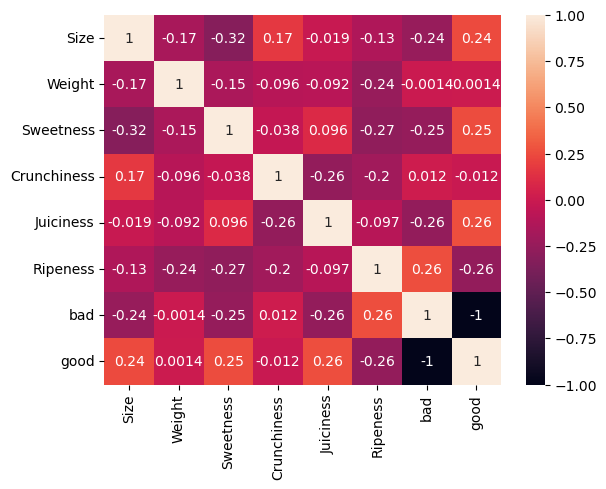

In [26]:
sns.heatmap(corr, annot= True)

In [28]:
NB = GaussianNB() 

In [32]:
new_df.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,bad,good
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,0,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,0,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,1,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,0,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,0,1


In [34]:
new_df = new_df.drop('bad', axis='columns')
new_df.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,good
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,1


In [35]:
x = new_df.drop('good', axis = 'columns')
y = new_df.good

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= .20)

In [37]:
def train(model, model_name):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    model_train_score = model.score(x_train, y_train)
    model_test_score = model.score(x_test, y_test)
    print(f"{model_name} model score on Training data: {model_train_score * 100}%\n{model_name} model score on Testing data: {model_test_score * 100}%")
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared= False)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    result = pd.DataFrame({'actual': y_test, 'Predicted': y_pred})
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cf_matrix = confusion_matrix(y_test, y_pred)
    
    print(cf_matrix)
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')
    print(result)
    print(f'the mean squared error is : {mse:.2f}\n')
    print(f'the root mean squared error is : {rmse:.2f}\n')
    print(f'the mean absolute error is : {mae:.2f}\n')
    print(f'the r2 score is : {r2:.2f}\n')

In [38]:
train(NB, 'Naive_bayes')

Naive_bayes model score on Training data: 74.90625%
Naive_bayes model score on Testing data: 75.0%
[[297 104]
 [ 96 303]]
Precision: 0.74
Recall: 0.76
F1 Score: 0.75
      actual  Predicted
1346       1          0
1828       0          1
2995       0          0
2647       0          1
2985       0          1
...      ...        ...
2367       1          1
3906       0          0
3112       0          0
3124       1          1
1474       0          0

[800 rows x 2 columns]
the mean squared error is : 0.25

the root mean squared error is : 0.50

the mean absolute error is : 30.73

the r2 score is : -0.00

